# Class Challenge: Image Classification of COVID-19 X-rays
# Task 1 [Total points: 30]

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Binary Classification: COVID-19 vs. Normal

In [2]:
%tensorflow_version 2.x
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#os.environ['OMP_NUM_THREADS'] = '1'
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.4.1'

#### Load Image Data

In [3]:
DATA_LIST = os.listdir('/content/drive/MyDrive/two')
DATASET_PATH  = '/content/drive/MyDrive/two/train'
TEST_DIR =  '/content/drive/MyDrive/two/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

In [4]:
print(DATA_LIST)

['train', 'test']


#### Generate Training and Validation Batches

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')

train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="binary")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=False,batch_size=BATCH_SIZE,
                                                  subset = "validation",seed=42,
                                                  class_mode="binary")

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 104 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [8]:
#raise NotImplementedError("Build your model based on an architecture of your choice "
#                          "A sample model summary is shown below")

VGG16_MODEL = tf.keras.applications.VGG16(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')
VGG16_MODEL.trainable=False
flatten_layer = tf.keras.layers.GlobalAveragePooling2D()
dense_layer1 = tf.keras.layers.Dense(128, activation='relu')
dense_layer2 = tf.keras.layers.Dense((NUM_CLASSES),activation='sigmoid')

model = tf.keras.Sequential([
  VGG16_MODEL,
  flatten_layer,
  dense_layer1, dense_layer2
])

In [9]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#model.compile(optimizer=opt, loss = ...)

model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 14,780,610
Trainable params: 65,922
Non-trainable params: 14,714,688
_________________________________________________________________


#### [5 points] Train Model

In [ ]:
#tf.__version__
#tf.test.is_gpu_available()
#tf.config.list_physical_devices('GPU')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
#from tensorflow.keras.models import load_model
#model = load_model('/content/drive/MyDrive/mmmodel.tf/')
#tf.config.list_physical_devices('GPU')
#keras.backend._get_available_gpus()

In [ ]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

#IMAGE_SIZE    = (224, 224)
#NUM_CLASSES   = len(DATA_LIST)
#BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
#NUM_EPOCHS    = 10
#LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 
#raise NotImplementedError("Use the model.fit function to train your network")

# change model architecture (different pre-trained, more layers), change parameters (different epochs), 
# figure what architectures are designed for and try to implement / adding to it
# what the model is looking at
history = model.fit(train_batches, validation_data=valid_batches, epochs=NUM_EPOCHS)

#### [5 points] Plot Accuracy and Loss During Training

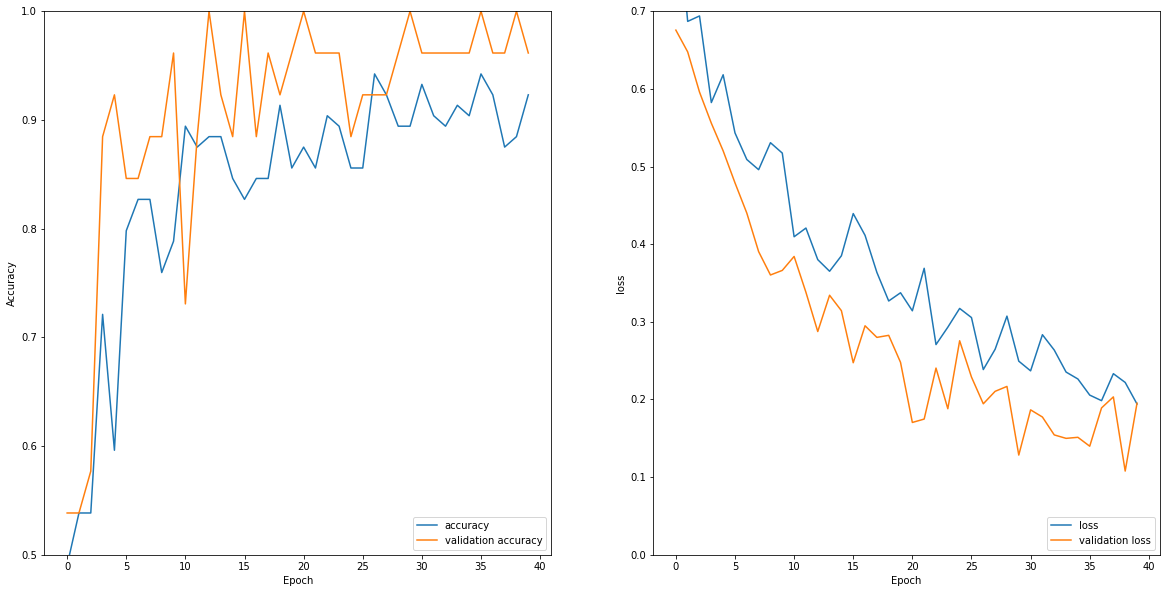

In [12]:
import matplotlib.pyplot as plt

#raise NotImplementedError("Plot the accuracy and the loss during training")
fig,axs = plt.subplots(1,2, figsize=(20,10))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'validation accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim([0.5, 1])
axs[0].legend(loc='lower right')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'validation loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('loss')
axs[1].set_ylim([0, 0.7])
axs[1].legend(loc='lower right')

#### Plot Test Results

In [ ]:
import matplotlib.image as mpimg

test_datagen = ImageDataGenerator(rescale=1. / 255)
eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")
eval_generator.reset()
pred = model.predict_generator(eval_generator,18,verbose=1)
for index, probability in enumerate(pred):
    image_path = TEST_DIR + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    if image.ndim < 3:
        image = np.reshape(image,(image.shape[0],image.shape[1],1))
        image = np.concatenate([image, image, image], 2)
#         print(image.shape)

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    print(probability)
    print(eval_generator.classes[index])
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19 Pneumonia")
    plt.show()

## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 130 images belonging to 2 classes.


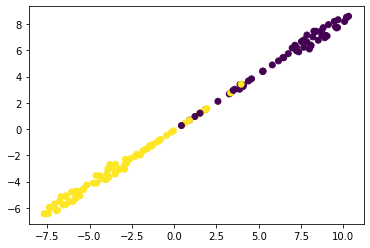

In [16]:
import sklearn
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=dense_layer2.output)
tsne_data_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="binary")

# raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
#                           "and plot the resulting 2D features of the two classes.")
# call predict on intermediate model pass generator and use that output to fit (transform) TSNE.

color = [tsne_data_generator[i][1] for i in range(len(tsne_data_generator))]
tsne = intermediate_layer_model.predict(tsne_data_generator)
embedded = TSNE().fit_transform(tsne)
x = [i[0] for i in embedded]
y = [i[1] for i in embedded]
plt.scatter(x,y,c=color)

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->